# Regresión con Scikit-learn

**Autor:** Roberto Muñoz <br />
**E-mail:** <rmunoz@metricarts.com> <br />
**Github:** <https://github.com/rpmunoz> <br />

## 1. Regresión

En regresión, la etiqueta es continua, es decir una salida real. Por ejemplo, en astronomía, la tarea de determinar si un objeto es una estrella, una galaxia o un cuásar es un problema de clasificación: la etiqueta viene de tres categorías distintas. Por otro lado, podríamos querer estimar la edad de un objeto basándonos en su imagen: esto sería regresión, porque la etiqueta (edad) es una cantidad continua.

Usaremos el dataet diabetes de scikit-learn, el cual consiste de 10 variables fisiológicas (age, sex, weight, blood pressure) medidas en 442 pacientes, y el avance de la enfermedad después de un año.

- age: Edad
- sex: Sexo
- body mass index: Índice de masa corporal
- average blood pressure: Presión sanguinea promedio
- s1-s6: Mediciones del suero sanguíneo

In [4]:
import numpy as np
import pandas as pd
from sklearn import datasets

diabetes = datasets.load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names'])

In [5]:
diabetes

{'DESCR': 'Diabetes dataset\n================\n\nNotes\n-----\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\nData Set Characteristics:\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attributes:\n    :Age:\n    :Sex:\n    :Body mass index:\n    :Average blood pressure:\n    :S1:\n    :S2:\n    :S3:\n    :S4:\n    :S5:\n    :S6:\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttp://www4.stat.ncsu.edu/~boos/var.select/diabetes.html\n\nFor more information see:\nB

In [12]:
# Creamos un dataframe a partir del dataset cargado desde scikit-learn

diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df["avance"]=diabetes.target

print("Tamaño del dataset: ", len(diabetes_df))
diabetes_df.head()

Tamaño del dataset:  442


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,avance
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


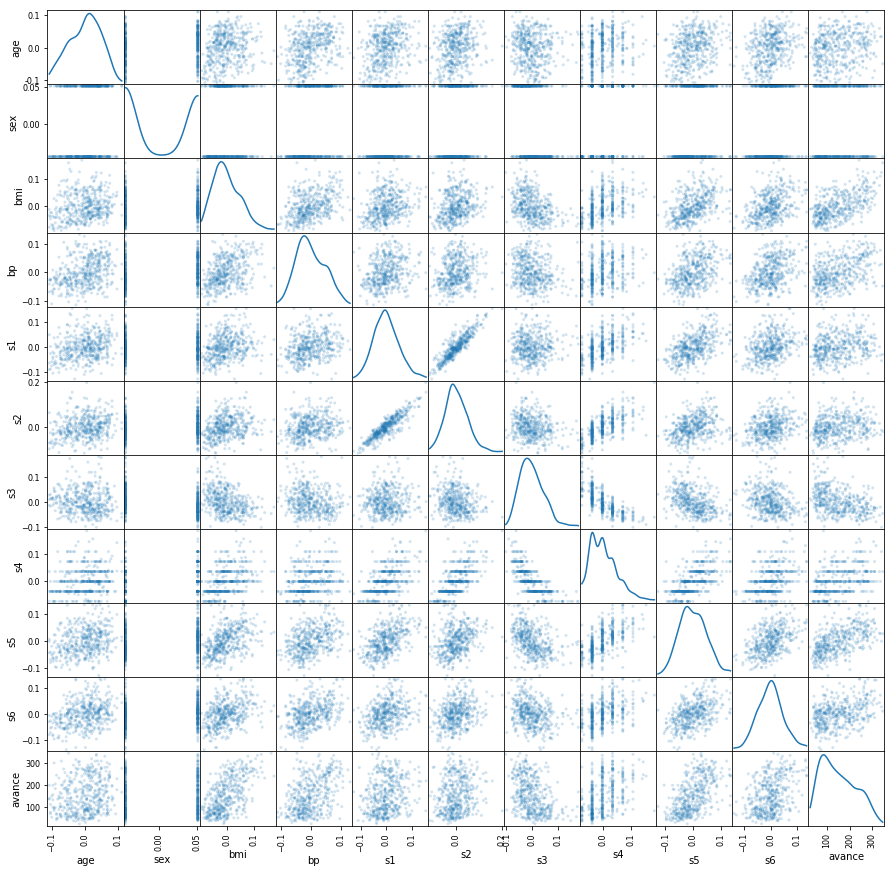

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import scatter_matrix

plot=scatter_matrix(diabetes_df, alpha=0.2, figsize=[15, 15], marker=".", diagonal='kde')

In [9]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(diabetes_df, test_size=0.3)

print("Tamaño del train set: ", len(df_train))
print("Tamaño del test set: ", len(df_test))

Tamaño del train set:  309
Tamaño del test set:  133


# 2. Regresión lineal

$$ \text{min}_{\mathbf{w}, b} \sum_i || \mathbf{w}^\mathsf{T}\mathbf{x}_i + b  - y_i||^2 $$

## 2.1 Caso simple (1 feature)

Partiremos consturyendo un modelo lineal usando el campo bmi, el cual corresponde a la columna numero 2

Usaremos la función LinearRegression que permite crear un modelo lineal usando la regresión de mínimos cuadrados.

In [52]:
X_train=np.array(df_train.iloc[:,2])[np.newaxis].T
y_train=np.array(df_train.iloc[:,10])

X_test=np.array(df_test.iloc[:,2])[np.newaxis].T
y_test=np.array(df_test.iloc[:,10])

In [55]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)

print("R^2 en entrenamiento: %f" % regr.score(X_train, y_train))
print("R^2 en test: %f" % regr.score(X_test, y_test))

R^2 en entrenamiento: 0.321483
R^2 en test: 0.393204


In [56]:
print(regr.coef_)

[ 911.96974533]


In [58]:
y_pred = regr.predict(X_test)

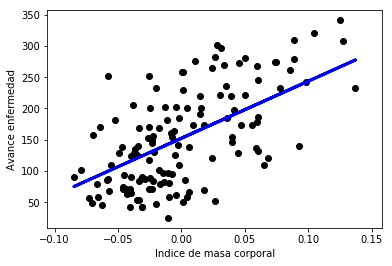

In [60]:
# Usaremos el campo bmi para graficar el ajuste lineal

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xlabel('Indice de masa corporal')
plt.ylabel('Avance enfermedad')

plt.show()

## 2.2 Caso multivariado (Todos los features)

Usaremos todos los features para generar un modelo lineal

In [61]:
X_train=np.array(df_train.iloc[:,0:10])
y_train=np.array(df_train.iloc[:,10])

X_test=np.array(df_test.iloc[:,0:10])
y_test=np.array(df_test.iloc[:,10])

In [62]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)

print("R^2 en entrenamiento: %f" % regr.score(X_train, y_train))
print("R^2 en test: %f" % regr.score(X_test, y_test))

R^2 en entrenamiento: 0.520261
R^2 en test: 0.485750


In [64]:
print(regr.coef_)

[  28.01284578 -267.57272389  433.41277327  311.4050801  -230.47399871
   16.24079245 -257.1255756    84.94931561  515.94527226  147.86628485]


## 2.3 Construcción de curva de aprendizaje

Scikit-learn permite calcular la curva de aprendizaje usando la función learning_curve. Es una herramienta que permite determinar cuanto ganamos al agregar mas datos al set de entrenamiento y determinar si el estimador sufre de un error de varianza o un erro de bias.

In [67]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(est, X, y, train_sizes=np.linspace(.1, 1, 20))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--', label="puntuaciones de entrenamiento " + estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-', label="puntuaciones de test " + estimator_name, c=line[0].get_color())
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.legend(loc='best')
    plt.ylim(-0.1, 1.1)


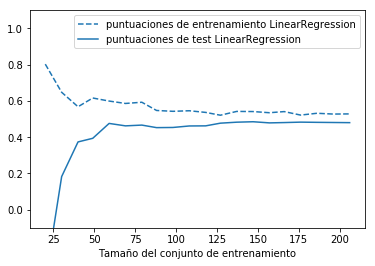

In [71]:
X=np.array(diabetes_df.iloc[:,0:10])
y=np.array(diabetes_df.iloc[:,10])

plt.figure()
plot_learning_curve(LinearRegression(), X_train, y_train)

In [70]:
X_test.shape## Regresión de cresta (*Ridge Regression*, penalización L2)

**El estimador de cresta (``Ridge``)** es una regularización simple (llamada regularización L2) para el modelo LinearRegression. En particular, tiene el beneficio de no ser más costoso computacionalmente que la estimación basada en mínimos cuadrados.

$$ \text{min}_{\mathbf{w},b}  \sum_i || \mathbf{w}^\mathsf{T}\mathbf{x}_i + b  - y_i||^2  + \alpha ||\mathbf{w}||_2^2$$ 

(133, 10)

# 3. Regresión de cresta (*Ridge Regression*, penalización L2)

**El estimador de cresta (``Ridge``)** es una regularización simple (llamada regularización L2) para el modelo LinearRegression. En particular, tiene el beneficio de no ser más costoso computacionalmente que la estimación basada en mínimos cuadrados.

$$ \text{min}_{\mathbf{w},b}  \sum_i || \mathbf{w}^\mathsf{T}\mathbf{x}_i + b  - y_i||^2  + \alpha ||\mathbf{w}||_2^2$$ 

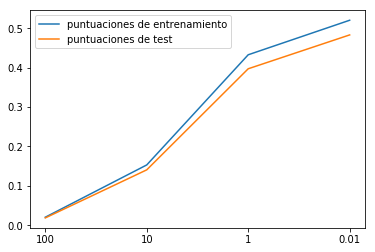

In [73]:
from sklearn.linear_model import Ridge
ridge_models = {}
training_scores = []
test_scores = []

for alpha in [100, 10, 1, .01]:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    training_scores.append(ridge.score(X_train, y_train))
    test_scores.append(ridge.score(X_test, y_test))
    ridge_models[alpha] = ridge

plt.figure()
plt.plot(training_scores, label="puntuaciones de entrenamiento")
plt.plot(test_scores, label="puntuaciones de test")
plt.xticks(range(4), [100, 10, 1, .01])
plt.legend(loc="best")

La cantidad de regularización se ajusta a través del parámetro `alpha` del modelo Ridge.

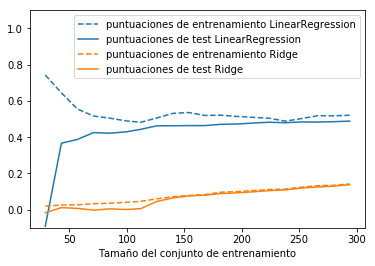

In [74]:
plt.figure()
plot_learning_curve(LinearRegression(), X, y)
plot_learning_curve(Ridge(alpha=10), X, y)

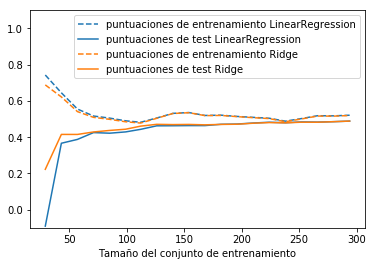

In [76]:
plt.figure()
plot_learning_curve(LinearRegression(), X, y)
plot_learning_curve(Ridge(alpha=0.0## Lasso (penalización L1)
**El estimador ``Lasso``** es útil para conseguir imponer dispersión en los coeficientes. En otras palabras, se debería preferir esta penalización si creemos que muchas de las características no son relevantes. Se consigue a través de la regularización L1.

$$ \text{min}_{\mathbf{w}, b} \sum_i \frac{1}{2} || \mathbf{w}^\mathsf{T}\mathbf{x}_i + b  - y_i||^2  + \alpha ||\mathbf{w}||_1$$ 1), X, y)

In [89]:
alphas = np.logspace(-4, -1, 6)
print("Alphas: ", alphas)

ridge = Ridge(alpha=.1)
scores = [ridge.set_params(alpha=alpha).fit(X_train, y_train,).score(X_test, y_test) for alpha in alphas]
print("Score: ", scores) 

best_alpha = alphas[scores.index(max(scores))]
print("Best alpha: ", best_alpha)

Alphas:  [ 0.0001      0.00039811  0.00158489  0.00630957  0.02511886  0.1       ]
Score:  [0.48567219255183408, 0.48545580131404831, 0.48477584234393234, 0.48342236384916182, 0.48191368641160015, 0.47770147121886919]
Best alpha:  0.0001


# 4. Lasso (penalización L1)
**El estimador ``Lasso``** es útil para conseguir imponer dispersión en los coeficientes. En otras palabras, se debería preferir esta penalización si creemos que muchas de las características no son relevantes. Se consigue a través de la regularización L1.

$$ \text{min}_{\mathbf{w}, b} \sum_i \frac{1}{2} || \mathbf{w}^\mathsf{T}\mathbf{x}_i + b  - y_i||^2  + \alpha ||\mathbf{w}||_1$$ 

Del primer gráfico podemos ver que el campo sex no aporta mucha información en la predicción de la variable avance de enfermedad.

In [90]:
from sklearn.linear_model import Lasso

lasso = Lasso()
scores = [lasso.set_params(alpha=alpha).fit(X_train, y_train).score(X_test, y_test) for alpha in alphas]
best_alpha = alphas[scores.index(max(scores))]

print("Best alpha: ", best_alpha)

lasso.alpha = best_alpha
lasso.fit(X_train, y_train)

Best alpha:  0.1


Lasso(alpha=0.10000000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [92]:
print(lasso.coef_)

[   0.         -179.97986236  428.54612027  276.95802034   -0.
  -69.34727857 -317.67706987    0.          440.17261607  110.2684208 ]
